In [5]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.9.0+cpu'

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"using device:{device}")

using device:cpu


In [7]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X+bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [8]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], X[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

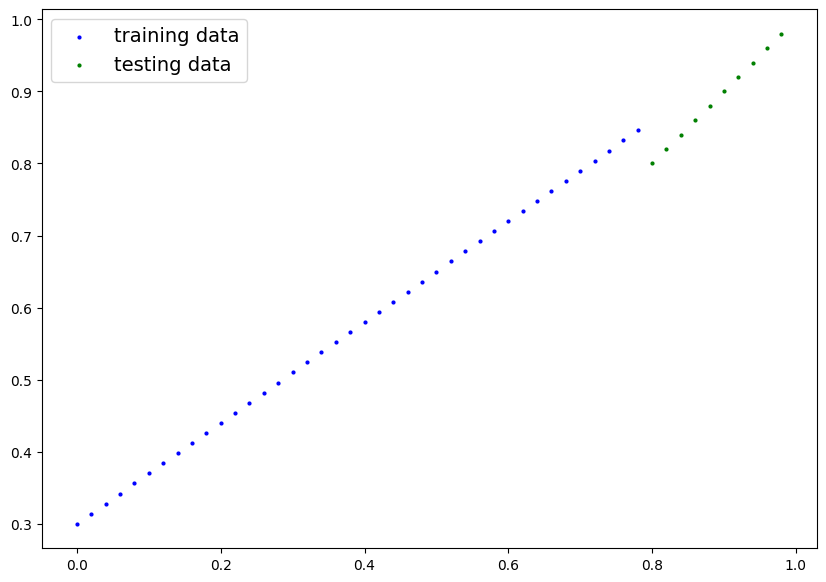

In [9]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

  #plot training data then tests and compares

  plt.figure(figsize=(10, 7))

  plt.scatter(train_data, train_labels, c='b', s=4, label="training data")
  plt.scatter(test_data, test_labels, c='g', s=4, label="testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label="predictions")

  plt.legend(prop={"size" : 14});
plot_predictions()

In [10]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [11]:
next(model_1.parameters()).device

device(type='cpu')

In [12]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [13]:
torch.manual_seed(42)

epochs = 1000

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  y_pred = model_1(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()

  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  if epoch%100 == 0:
    print(f"Epoch:  {epoch} | Train loss: {loss} | Test loss:  {test_loss}")

Epoch:  0 | Train loss: 0.5551779866218567 | Test loss:  0.6069762706756592
Epoch:  100 | Train loss: 0.006215679459273815 | Test loss:  0.021886223927140236
Epoch:  200 | Train loss: 0.0012645035749301314 | Test loss:  0.021345829591155052
Epoch:  300 | Train loss: 0.0012645035749301314 | Test loss:  0.021345829591155052
Epoch:  400 | Train loss: 0.0012645035749301314 | Test loss:  0.021345829591155052
Epoch:  500 | Train loss: 0.0012645035749301314 | Test loss:  0.021345829591155052
Epoch:  600 | Train loss: 0.0012645035749301314 | Test loss:  0.021345829591155052
Epoch:  700 | Train loss: 0.0012645035749301314 | Test loss:  0.021345829591155052
Epoch:  800 | Train loss: 0.0012645035749301314 | Test loss:  0.021345829591155052
Epoch:  900 | Train loss: 0.0012645035749301314 | Test loss:  0.021345829591155052


In [14]:
from pprint import pprint
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [15]:
model_1.eval()

with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

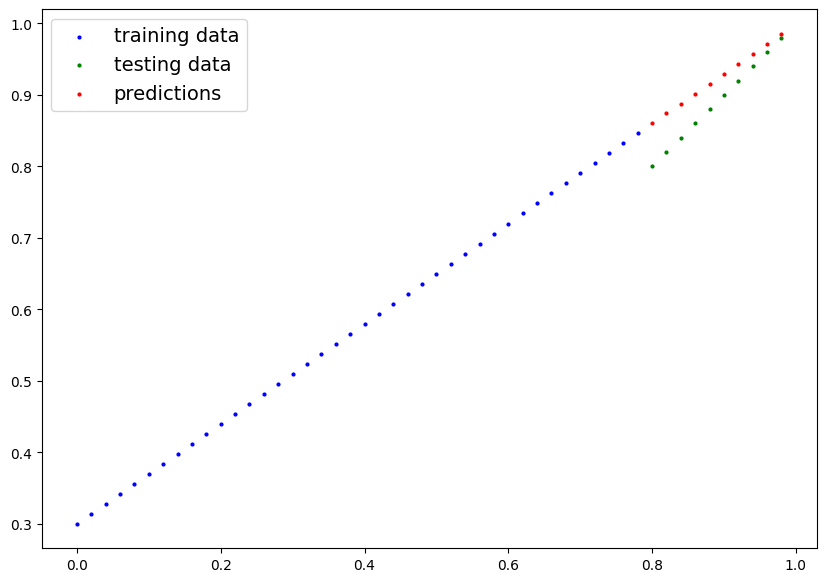

In [16]:
plot_predictions(predictions=y_preds)

In [17]:
from pathlib import Path

model_path = Path("models")
model_path.mkdir(parents=True, exist_ok=True)

model_name="01_pytorch_workflow_model_1.pth"
model_save_path = model_path / model_name

print("saving model to: " + str(model_save_path))
torch.save(obj=model_1.state_dict(), f=model_save_path)

saving model to: models/01_pytorch_workflow_model_1.pth


In [19]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

# Load model state dict
loaded_model_1.load_state_dict(torch.load(model_save_path))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cpu


In [20]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])